# Frequency Filtering
Images are 2D signals and we can apply principles of frequency filtering for making our filters more efficient or for understanding better phenomena. As a visual recap of Discrete Fourirer Trasnform check http://madebyevan.com/dft/

Which are the 2D basis of the Fourier Transformation of Images? We visually express them as 2-channel images, with real and complex parts.

Which is the meaning of a pixel in the fourier representation? 

What is the meaning of phase and amplitude in such images?

## OpenCV
OpenCV provides the dft function:

* cv2.dft(src[, dst[, flags[, nonzeroRows]]]) → dst

Mathematically we should always deal with complex images, so that a real image has only real components. In reality this is quite inefficient and OpenCV represent DFT transformed images from real images in a special format that accounts for the zero part of the transformation.

Given this, if src is single-channel then it is treated as real and the destination is special-spectrum.

Finally, it has to be noted that DFT works well with power of two and cv2.getOptimalDFTSize(size) returns this information

## Frequency filtering with Numpy

Numpy provides fft2 and fftshift for computing the fourier transformation of a tensor. It acts on two abritrary axis.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft2.html


## Convolution in Frequency Space

Convolution in frequency space is linear to the number of pixel, so we need to compute the DFT of the image and of the kernel, then product and get back to the output image.

The computational cost of a 2D DFT is: O(MN (log(MN))) , while the time-convolution is O(K^2 MN) or O(K MN) if the kernel is separable. 

In practice filtering in frequency is efficient only if we have the input/output in frequency space.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
from IPython.display import display
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

imshowg = lambda x: plt.imshow(x,cmap=plt.get_cmap('gray'))
conv2D = lambda x,k: cv2.filter2D(x, -1, k)

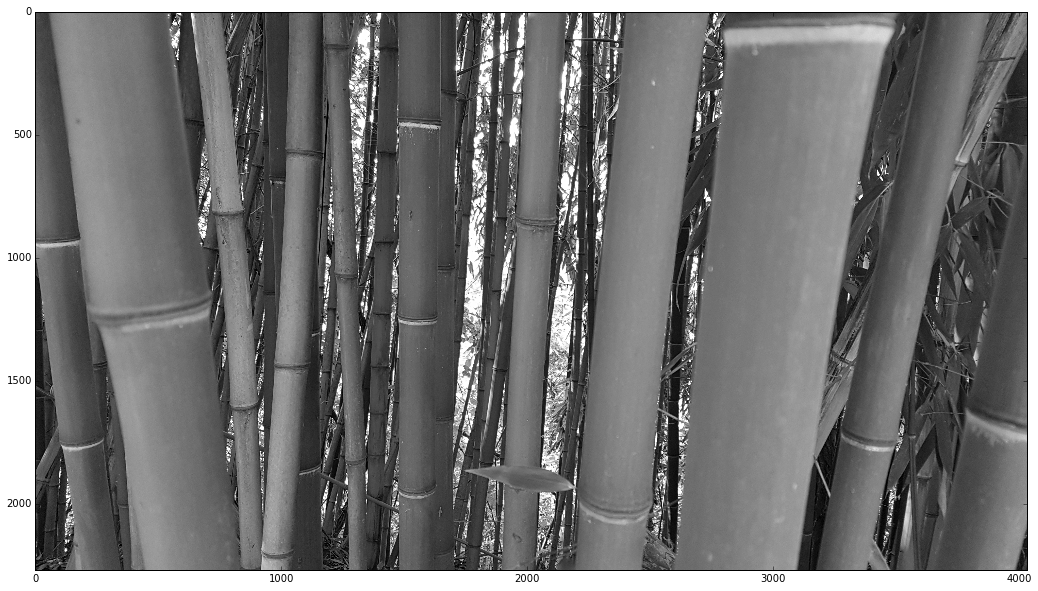

In [3]:
img_in  = cv2.imread('example.jpg',cv2.IMREAD_GRAYSCALE)
imshowg(img_in)

In [17]:
optsize = (cv2.getOptimalDFTSize(img_in.shape[0]),cv2.getOptimalDFTSize(img_in.shape[1]))
print img_in.shape,optsize
q = np.fft.fft2(img_in,s=optsize,axes=(0,1))
print (q.shape)
qm = np.log(np.absolute(q)**2)
qms = np.fft.fftshift(qm)

(2268, 4032) (2304, 4050)
(2304, 4050)


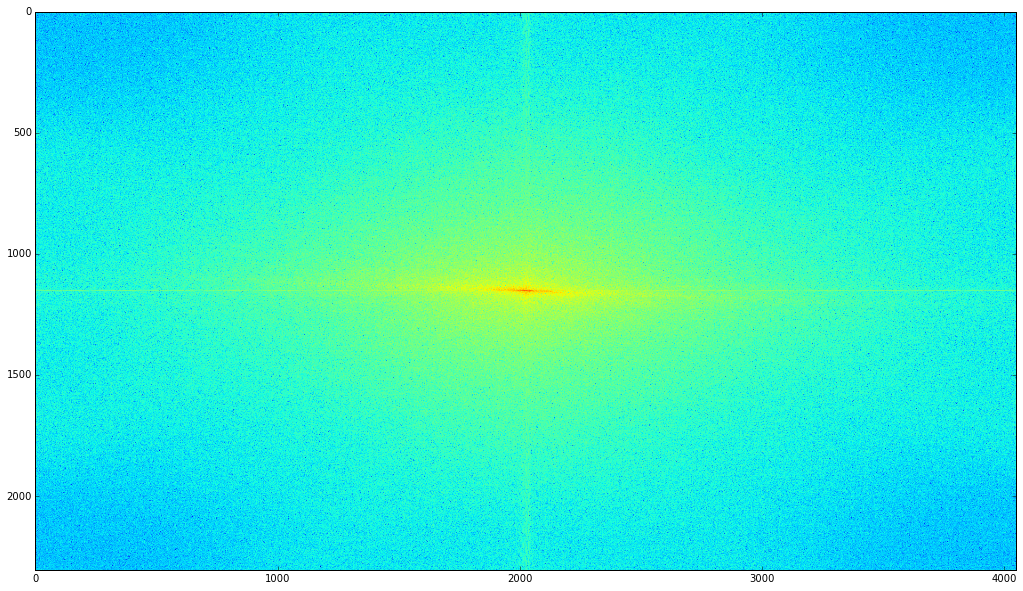

In [18]:
plt.imshow(qms)

In [24]:
optsize = (cv2.getOptimalDFTSize(img_in.shape[0]),cv2.getOptimalDFTSize(img_in.shape[1]),2)
dst = np.zeros(optsize,dtype=np.float64)
dst[0:img_in.shape[0],0:img_in.shape[1],0] = img_in
cv2.dft(dst,dst=dst,nonzeroRows=img_in.shape[0]) #flags=cv2.DFT_SCALE|cv2.DFT_COMPLEX_OUTPUT)
cv2.imshow("ciao",dst)
cv2.waitkey(0)
x = dst
print x.shape,x.dtype,"instead of",img_in.shape
def normalizer(x,s=1):
    mi = x.min()
    ma = x.max()
    print mi,ma
    return (x-mi)/((ma-mi)*s)
#xp = np.sqrt(x[:,:,0]**2+x[:,:,1]**2)
y = normalizer(x[:,:,0])
print y.shape,y.dtype
plt.subplot(1,3,1)
plt.imshow(y)
plt.subplot(1,3,2)
plt.imshow(x[:,:,1])
cv2.imwrite('x.jpg',(y*255.0).astype(np.uint8))
#magnitude = cv2.sqrt(image_Re**2.0 + image_Im**2.0)
#log_spectrum = cv2.log(1.0 + magnitude)
#shift_dft(log_spectrum, log_spectrum)
#cv2.normalize(log_spectrum, log_spectrum, 0.0, 1.0, cv2.NORM_MINMAX)

TypeError: expected string or Unicode object, numpy.ndarray found

(128, 128)


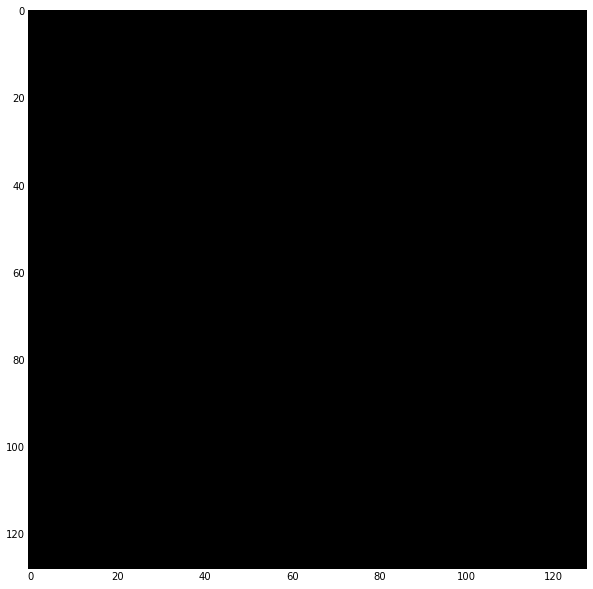

In [54]:
x = np.zeros((128,128,2),dtype=np.float32)
x[0,0,0] = 255
y = cv2.idft(x,flags=cv2.DFT_REAL_OUTPUT)
print y.shape
imshowg(y)

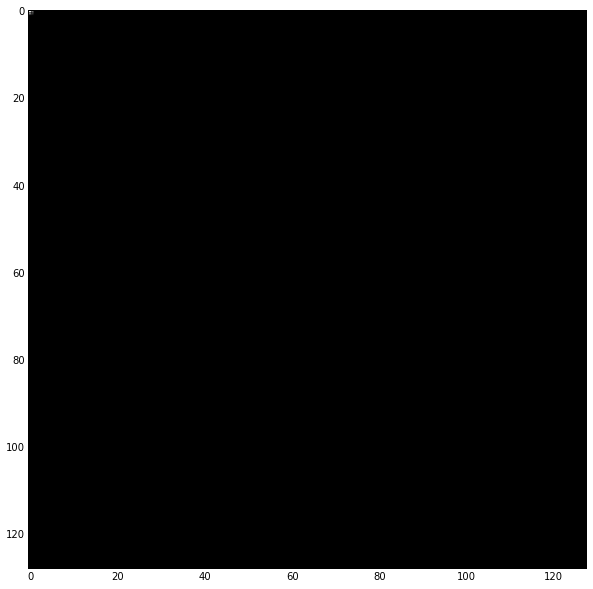

In [43]:
x = 10*np.ones((128,128),dtype=np.float32)
y = cv2.dft(x)
imshowg(y)

In [ ]:
r